Эркенова Джамиля, 15.11Д-ПМ03/19б

# Задача обнаружения мошенничества

### Банки часто сталкиваются с мошенническими транзакциями и постоянно совершенствуют системы для их отслеживания. Этот набор банковских данных содержит более 20 тыс. транзакций со 112 функциями (числовыми признаками). Постройте модель бинарной классификации для обнаружения мошеннических транзакций.

## Загрузка библиотек и предварительный анализ данных

In [69]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
#sns.set_style('darkgrid')
#sns.set_palette('Pastel1')


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

Считаем файл fraud_detection_bank_dataset.csv в переменную data. Изучим данные.

In [70]:
data=pd.read_csv('fraud_detection_bank_dataset.csv')
data.head()

,Unnamed: 0,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
0,0,9,1354,0,18,0,1,7,9,0,...,0,0,0,1,1,0,0,0,49,1
1,1,0,239,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,55,1
2,2,0,260,0,4,0,3,6,0,0,...,0,0,0,1,1,0,0,0,56,1
3,3,17,682,0,1,0,0,8,17,0,...,0,1,0,1,1,0,0,0,65,1
4,4,1,540,0,2,0,1,7,1,0,...,0,0,0,1,1,0,0,0,175,1


In [71]:
data.shape

(20468, 114)

In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20468 entries, 0 to 20467
Columns: 114 entries, Unnamed: 0 to targets
dtypes: float64(1), int64(113)
memory usage: 17.8 MB


In [73]:
# Удалим столбец Unnamed: 0
data.drop('Unnamed: 0',axis=1,inplace=True)
data.shape

(20468, 113)

In [74]:
# Проверим наличие пропусков
data.isnull().sum()

col_0      0
col_1      0
col_2      0
col_3      0
col_4      0
          ..
col_108    0
col_109    0
col_110    0
col_111    0
targets    0
Length: 113, dtype: int64

In [75]:
# Описательная статистика
data.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_8,col_9,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.0,20468.0,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.0,0.0,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.0,0.0,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.0,0.0,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,0.0,0.0,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


In [76]:
# Проверим уникальные записи в каждом столбце.
# Если столбец содержит только одно уникальное значение, то этот столбец не важен, давайте проверим это
columns_drop = []
for col in data.columns:
    if data[col].unique().sum() ==0:
        columns_drop.append(col)
print(columns_drop)
print(len(columns_drop))

['col_8', 'col_9', 'col_10', 'col_11', 'col_12', 'col_18', 'col_19', 'col_20', 'col_21', 'col_35', 'col_51', 'col_52', 'col_53', 'col_70', 'col_71']
15


In [77]:
# Столбцы col_8  col_9, col_10, col_11, col_12, col_18, col_19, col_20, col_21, col_35, 
# col_51, col_52, col_53, col_70 и col_71 можно удалить
data.drop(columns_drop,axis=1,inplace=True)
data.shape

(20468, 98)

In [78]:
# Описательная статистика
data.describe()

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
count,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,...,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000,20468.000000
mean,3.226256,294.793043,0.420021,2.329343,0.083594,0.939857,2.386066,3.226256,0.038646,0.363152,...,0.004935,0.358120,0.002443,0.308384,0.190737,0.000049,0.049345,0.024282,43.486125,0.265683
std,20.564308,717.541984,7.367275,10.068512,0.840537,4.222896,3.018140,20.564308,0.192754,0.480920,...,0.073478,0.479459,0.049366,0.461837,0.392892,0.006990,0.216593,0.305079,59.217560,0.441707
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000
50%,0.000000,97.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000,0.000000
75%,2.000000,283.000000,0.000000,2.000000,0.000000,1.000000,6.000000,2.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,61.250000,1.000000
max,2301.000000,37808.000000,904.000000,772.000000,54.000000,230.000000,11.000000,2301.000000,1.000000,1.000000,...,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,17.000000,747.000000,1.000000


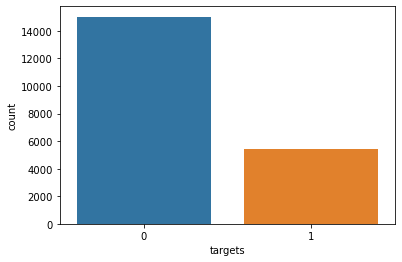

Ratio Target Class


0    15030
1     5438
Name: targets, dtype: int64

In [79]:
# Определим количество записей каждого класса
sns.countplot(data['targets'])
plt.show()

print('Ratio Target Class')
data['targets'].value_counts()

In [80]:
# Построим матрицу корреляций
corr=data.corr()
corr

,col_0,col_1,col_2,col_3,col_4,col_5,col_6,col_7,col_13,col_14,...,col_103,col_104,col_105,col_106,col_107,col_108,col_109,col_110,col_111,targets
col_0,1.000000,0.551274,0.005679,0.077408,-0.002019,0.037343,0.011153,1.000000,0.044412,0.081488,...,0.009964,-0.009675,0.003354,0.075413,0.078262,0.000603,0.011074,0.015806,0.052114,-0.041022
col_1,0.551274,1.000000,0.301637,0.280233,0.102733,0.246112,0.008418,0.551274,0.049807,0.195358,...,0.077884,0.021930,0.031179,0.232897,0.290501,-0.001469,0.088685,0.111713,0.206308,-0.109658
col_2,0.005679,0.301637,1.000000,0.018034,0.068560,-0.009578,0.001042,0.005679,-0.002485,0.010522,...,0.024692,0.001027,0.009001,0.041971,0.054846,0.005294,0.029326,0.009831,0.033094,-0.026381
col_3,0.077408,0.280233,0.018034,1.000000,-0.012554,-0.015184,-0.044345,0.077408,0.004267,0.097291,...,0.091980,-0.038370,0.046253,0.148617,0.199203,-0.001617,0.070381,0.049871,0.127431,-0.095612
col_4,-0.002019,0.102733,0.068560,-0.012554,1.000000,0.040922,0.014800,-0.002019,-0.002148,0.019296,...,0.019427,0.025733,-0.000212,0.059956,0.077622,-0.000695,0.051145,0.006374,0.056226,0.007819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
col_108,0.000603,-0.001469,0.005294,-0.001617,-0.000695,-0.001556,-0.000894,0.000603,-0.001401,-0.005278,...,-0.000469,-0.005221,-0.000346,0.010468,0.014398,1.000000,0.030680,-0.000556,0.013871,-0.004204
col_109,0.011074,0.088685,0.029326,0.070381,0.051145,0.124398,-0.003134,0.011074,0.006984,-0.023821,...,0.082940,0.107412,0.061839,0.057408,0.114461,0.030680,1.000000,0.139361,0.369065,0.166826
col_110,0.015806,0.111713,0.009831,0.049871,0.006374,0.116577,-0.008749,0.015806,0.022261,0.031141,...,0.040426,0.003011,0.200445,0.061286,0.150089,-0.000556,0.139361,1.000000,0.334947,0.071049
col_111,0.052114,0.206308,0.033094,0.127431,0.056226,0.223831,0.021537,0.052114,0.036921,0.037503,...,0.136194,0.402607,0.124260,0.221531,0.329699,0.013871,0.369065,0.334947,1.000000,0.262442


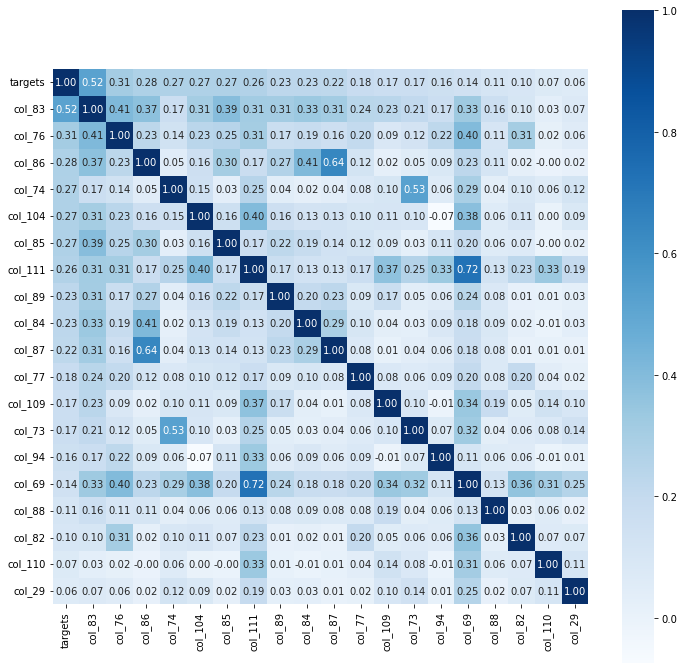

In [81]:
# Построим матрицу корреляции 20 лучших значений, которые в основном коррелируют с целевыми столбцами.
plt.figure(figsize = (12, 12))
k = 20 #number of variables for heatmap
cols = corr.nlargest(k, 'targets')['targets'].index
cm = np.corrcoef(data[cols].values.T)

hm = sns.heatmap(cm, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values, cmap = 'Blues')
plt.show()

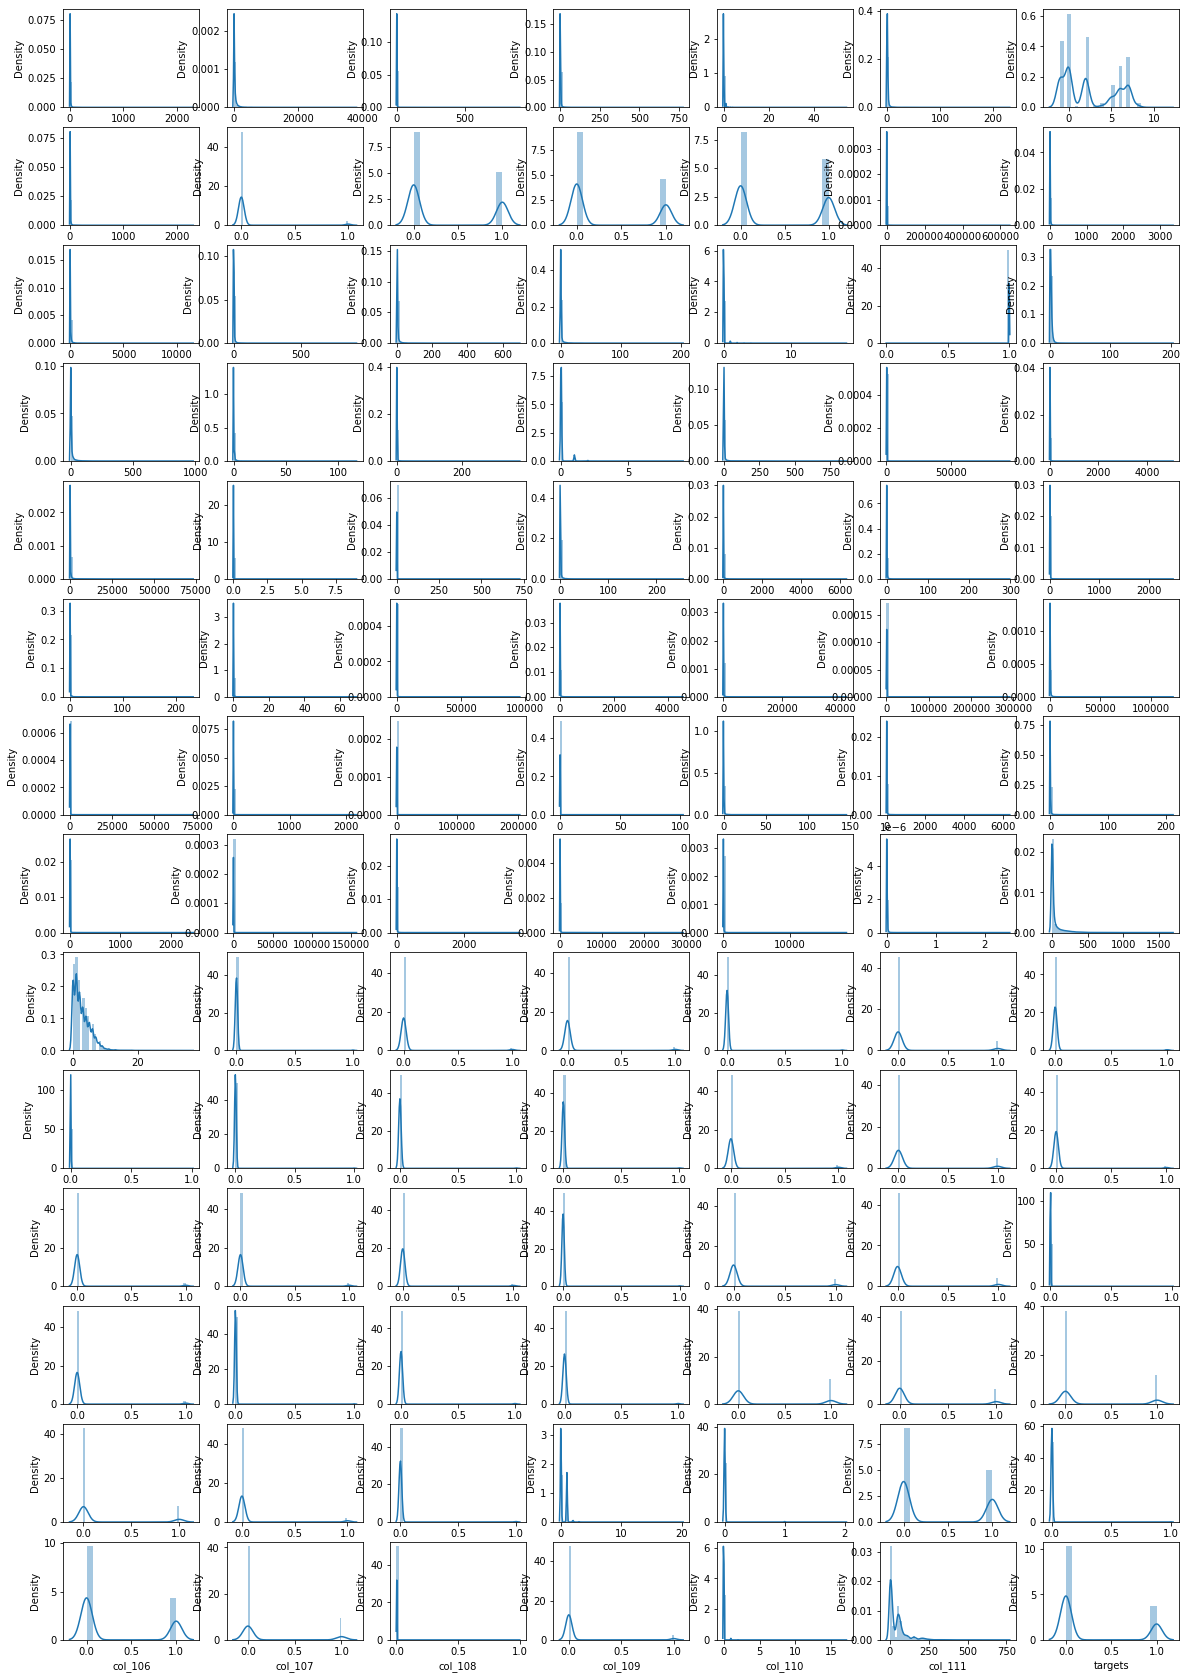

In [82]:
# Построим графики плотности распределения
fig = plt.figure(figsize = (20,30))
for i, v in enumerate(data.columns):
    axes = fig.add_subplot(14, 7, i+1)
    sns.distplot(data[v], ax = axes)

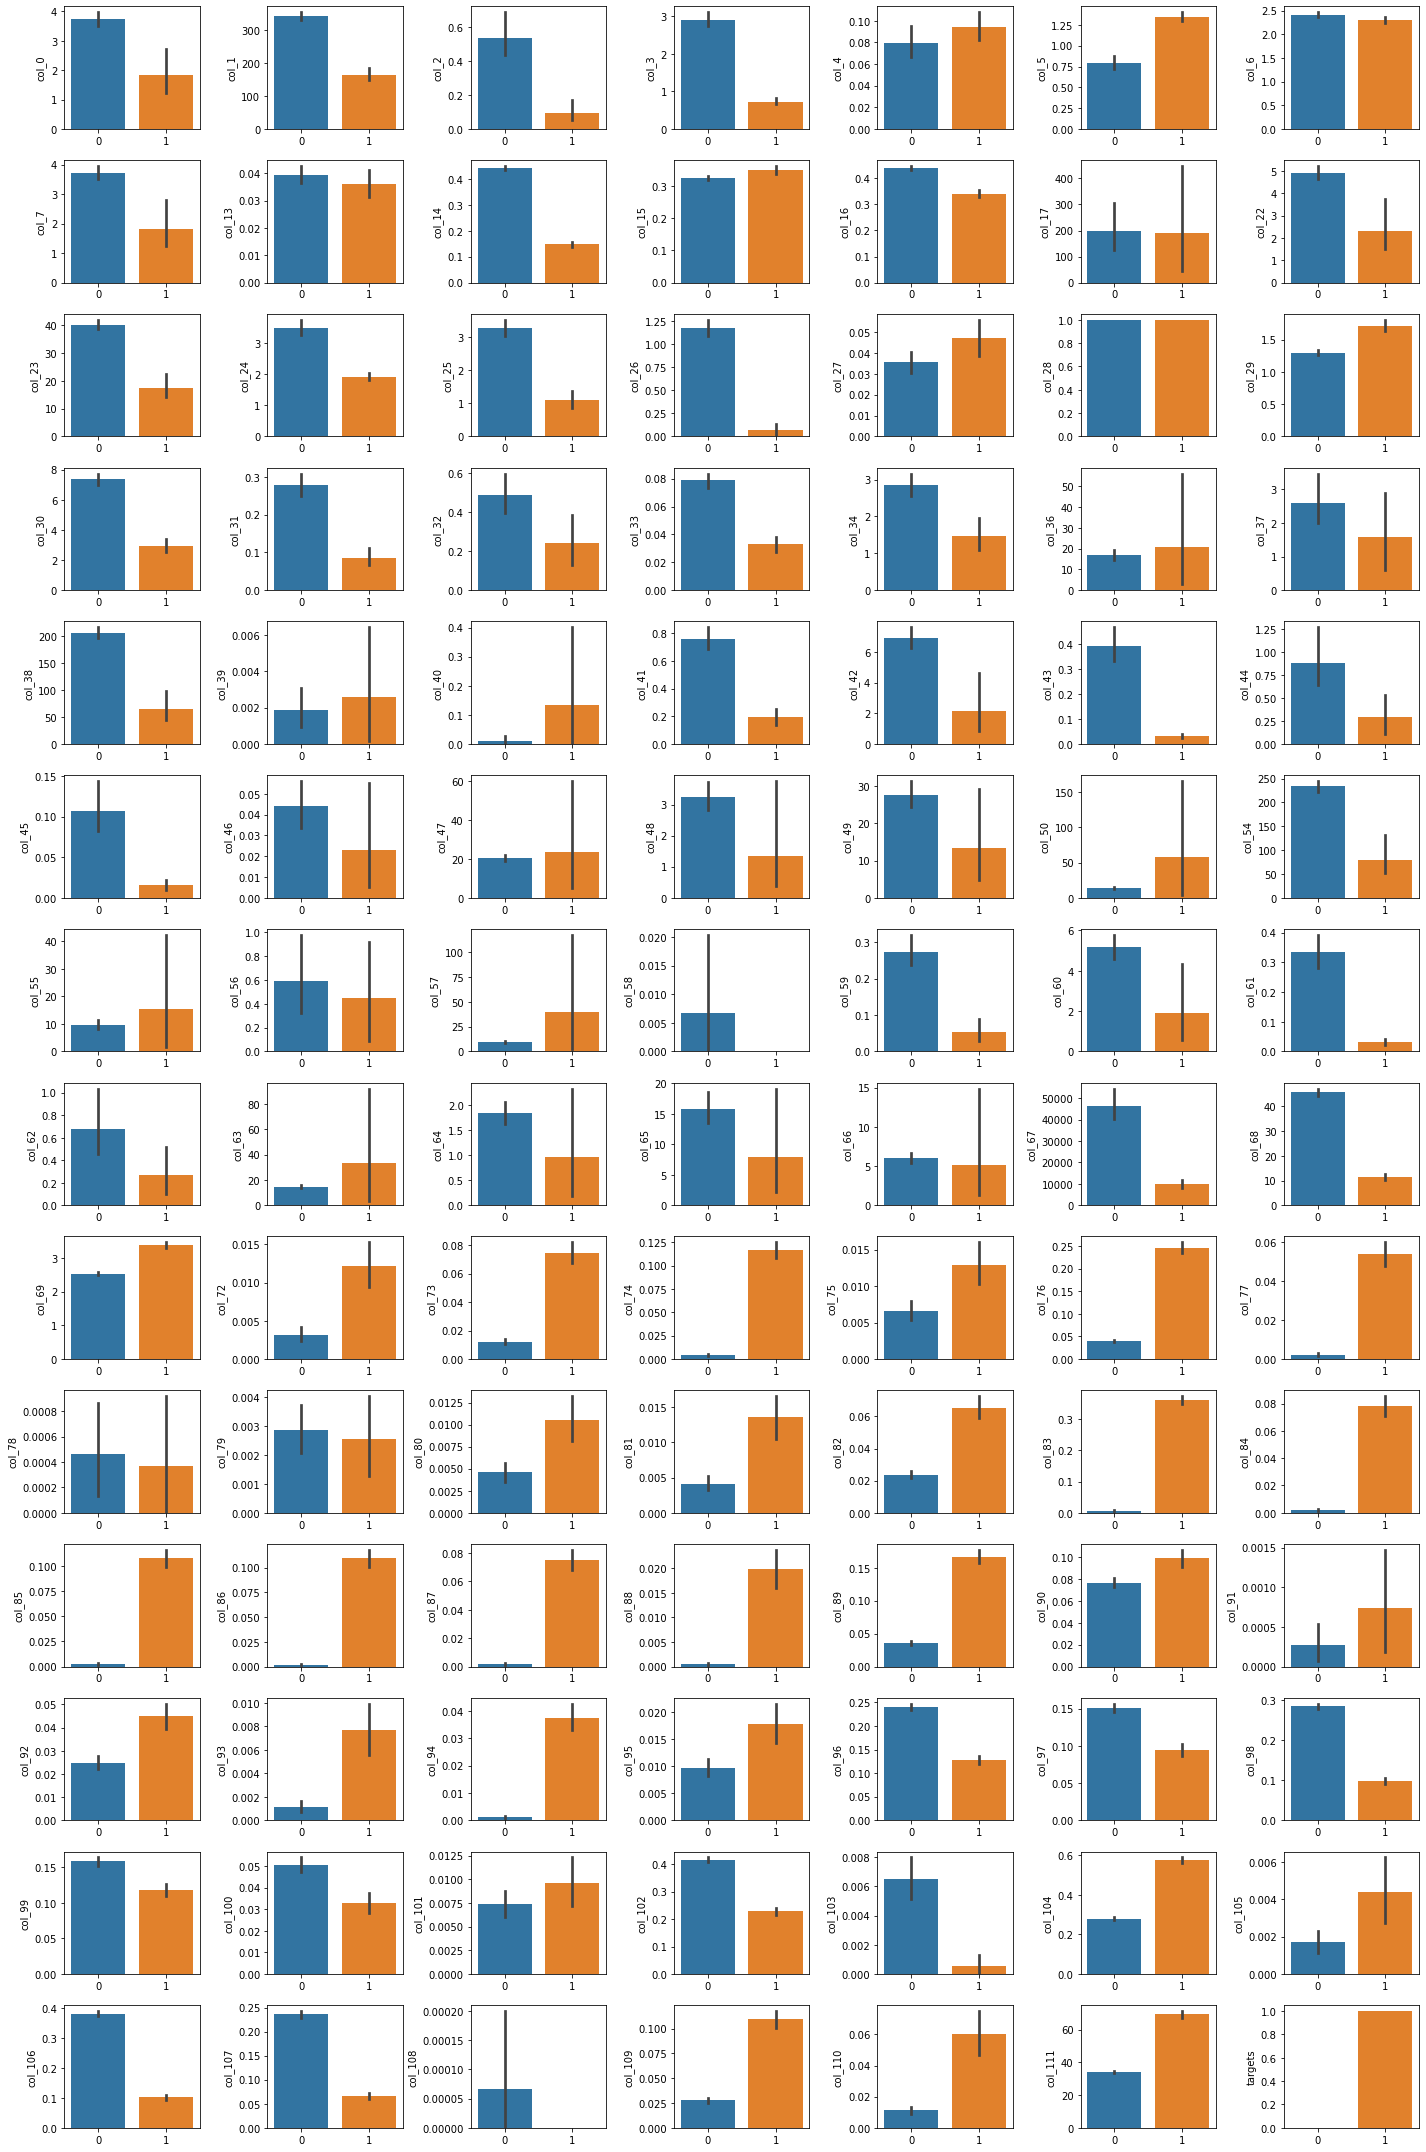

In [83]:
# Построим графики количества записей каждого класса по всем признакам
fig = plt.figure(figsize = (20,30))
for i, v in enumerate(data.columns):
    axes = fig.add_subplot(14, 7, i+1)
    sns.barplot(data=data, x=data['targets'], y= data[v], ax=axes)
    axes.set_xlabel('')
        
#plt.title('Features vs Targets')
plt.tight_layout()
plt.show()

# Подготовка данных и моделирование

In [84]:
X = data.drop(['targets'],axis=1)
y= data.targets

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [86]:
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (16374, 97) (16374,)
Test set: (4094, 97) (4094,)


## K-Nearest-Neighbor (KNN)

In [87]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 30)

train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, param_name = "n_neighbors", param_range = param_range)

In [88]:
#print(train_scores)
print(np.mean(train_scores, axis = 1))


[0.99985343 0.91342583 0.90201778 0.88899748 0.88412401 0.87981239
 0.87568402 0.87335111 0.86991892 0.86973571 0.86764705 0.86621799
 0.86470343 0.8636286  0.8621751  0.86139338 0.8602086  0.85979332
 0.85869405 0.85858413 0.85699628 0.85739935 0.85611687 0.85656881
 0.8545901  0.85479773 0.85340532 0.85410152 0.85311217]


In [89]:
#print(test_scores)
print(np.mean(test_scores, axis = 1))

[0.81058232 0.84473353 0.8372582  0.8518665  0.84922796 0.85269691
 0.85040087 0.85245268 0.85059621 0.85176857 0.85010757 0.85064499
 0.84849527 0.84942362 0.84825116 0.84810458 0.84781131 0.84844645
 0.84673646 0.84761588 0.84629679 0.84702955 0.84585715 0.84668762
 0.84571046 0.84590592 0.84517308 0.84619903 0.84478226]


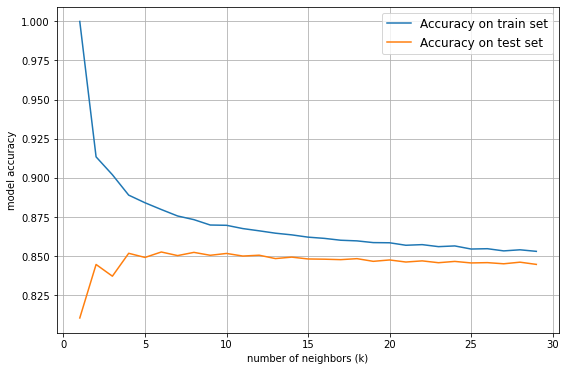

In [90]:
# Visualizing Validation Curve (Bias-Variance Dilemma) dependant from number of neighbors (k argument)
param_range = np.arange(1, 30)
plt.figure(figsize = (9, 6))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

# Reversing the X-axis
#plt.xlim(np.max(param_range), 0)
#plt.ylim(0.8, 1.1)

#plt.title("How does k influence the accuracy?", fontsize = 50)
plt.xlabel("number of neighbors (k)")
plt.ylabel("model accuracy")

#Adding a legend
plt.legend(["Accuracy on train set", "Accuracy on test set"], loc = "best", fontsize = 12)
plt.grid()
plt.show()


In [91]:
knn_model = KNeighborsClassifier(n_neighbors=6)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

In [92]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model_pred))

Train set Accuracy:  0.8795651642848418
Test set Accuracy:  0.857352222765022


In [93]:
print(jaccard_score(y_test, knn_model_pred,pos_label=0))
print(f1_score(y_test, knn_model_pred, average='weighted'))

0.8291398478642481
0.8512992449262781


[[2834  173]
 [ 411  676]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3007
           1       0.80      0.62      0.70      1087

    accuracy                           0.86      4094
   macro avg       0.83      0.78      0.80      4094
weighted avg       0.85      0.86      0.85      4094



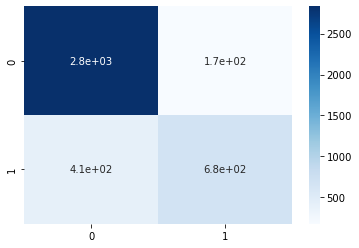

In [94]:
conf_matrix = confusion_matrix(y_test, knn_model_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, knn_model_pred))

In [95]:
#Accuracy of KNN for different k values

Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=knn.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.81167562, 0.84953591, 0.84269663, 0.85344406, 0.85075721,
       0.85735222, 0.85271128, 0.85466536, 0.85295554, 0.85637518,
       0.85539814, 0.85613092, 0.85295554, 0.85515388, 0.85222277,
       0.85124573, 0.84978017, 0.85002443, 0.84855887])

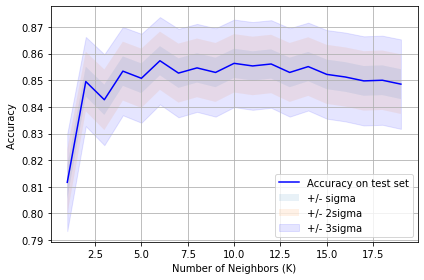

In [96]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.1)
plt.fill_between(range(1,Ks),mean_acc - 2 * std_acc,mean_acc + 2 * std_acc, alpha=0.1)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.1, color="blue")
plt.legend(('Accuracy on test set', '+/- sigma','+/- 2sigma','+/- 3sigma'), loc = 'best')
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.grid()
plt.tight_layout()
plt.show()

In [97]:
print( "The best accuracy was ", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was  0.857352222765022 with k= 6


In [98]:
knn_model_ = KNeighborsClassifier(n_neighbors=mean_acc.argmax()+1)
knn_model.fit(X_train, y_train)
knn_model_pred = knn_model.predict(X_test)

In [99]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, knn_model_pred))
acc = metrics.accuracy_score(y_test, knn_model_pred)
jacc = jaccard_score(y_test, knn_model_pred,pos_label=0)
f1 = f1_score(y_test, knn_model_pred, average='weighted')
roc = roc_auc_score(y_test, knn_model_pred)


Train set Accuracy:  0.8795651642848418
Test set Accuracy:  0.857352222765022


[[2834  173]
 [ 411  676]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.91      3007
           1       0.80      0.62      0.70      1087

    accuracy                           0.86      4094
   macro avg       0.83      0.78      0.80      4094
weighted avg       0.85      0.86      0.85      4094



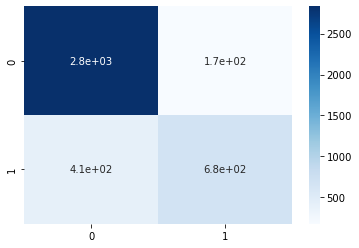

In [100]:
conf_matrix = confusion_matrix(y_test, knn_model_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, knn_model_pred))

In [101]:
#Настройка параметров. Используем кросс-валидацию для подбора параметров модели
#from sklearn.model_selection import cross_val_score
#from sklearn.metrics import accuracy_score
#cv_scores = []
#neighbors = list(np.arange(1,20,1))
#for n in neighbors:
#    knn = KNeighborsClassifier(n_neighbors = n)
    
#    cross_val = cross_val_score(knn,X_train,y_train, cv = 7, scoring = 'accuracy')
#    cv_scores.append(cross_val.mean())
    
#error = [1-x for x in cv_scores]
#optimal_n = neighbors[ error.index(min(error)) ]
#knn_optimal = KNeighborsClassifier(n_neighbors = optimal_n)
#knn_optimal.fit(X_train,y_train)
#pred = knn_optimal.predict(X_test)
#acc = accuracy_score(y_test,pred)*100
#print("optimal n = ", optimal_n)
#print("accuracy = ", acc)

In [102]:
Results = pd.DataFrame({'Algorithm': [],'Accuracy_score': [], 'J-score': [], "F-1 score":[], 'ROC-AUC-score': []})

In [103]:
res = pd.DataFrame({'Algorithm': ['K-Nearest Neighbor'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res)

## Decision Tree 

In [104]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 30)

train_scores, test_scores = validation_curve(DecisionTreeClassifier(), X, y, param_name = "max_depth", param_range = param_range)

In [105]:
#print(train_scores)
print(np.mean(train_scores, axis = 1))

[0.7665136  0.85844978 0.87943371 0.89089067 0.90603629 0.91762755
 0.92444304 0.93081885 0.93789088 0.94523157 0.95251122 0.9604871
 0.96664306 0.97234709 0.97713507 0.98133674 0.98500099 0.98794461
 0.99046073 0.99274478 0.99406391 0.99530976 0.9964701  0.99719073
 0.99778923 0.99832666 0.99869308 0.99904729 0.99936487]


In [106]:
#print(test_scores)
print(np.mean(test_scores, axis = 1))

[0.7665139  0.85772999 0.87707676 0.8872388  0.90150477 0.91117871
 0.91196039 0.91401239 0.91445195 0.91523376 0.91528277 0.91420769
 0.91513621 0.91420783 0.91127633 0.91049441 0.90766096 0.90619519
 0.90453432 0.90394806 0.90472959 0.9037524  0.90130974 0.90223817
 0.90047927 0.90062572 0.90003941 0.89920887 0.89984385]


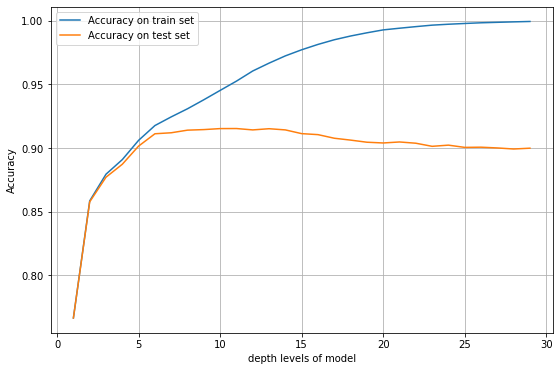

In [107]:
# Visualizing Validation Curve (Bias-Variance Dilemma) dependant from depth level of Decision Tree (max_depth argument)
plt.figure(figsize = (9, 6))

plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

#plt.title("How does the tree depth influence the accuracy?", fontsize = 20)
plt.xlabel("depth levels of model")
plt.ylabel("Accuracy")
plt.grid()
# Adding a legend
plt.legend(["Accuracy on train set", "Accuracy on test set"], loc = "best")

plt.show()

In [108]:
DTree = DecisionTreeClassifier(criterion="entropy", max_depth = 11)
DTree.fit(X_train,y_train)
predTree = DTree.predict(X_test)
print("Decision Trees's Accuracy: ", metrics.accuracy_score(y_test, predTree))
clf = DTree.fit(X, y)

Decision Trees's Accuracy:  0.9113336590131901


In [109]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, DTree.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predTree))
acc = metrics.accuracy_score(y_test, predTree)
jacc = jaccard_score(y_test, predTree,pos_label=0)
f1 = f1_score(y_test, predTree, average='weighted')
roc = roc_auc_score(y_test, predTree)

Train set Accuracy:  0.9460119701966533
Test set Accuracy:  0.9113336590131901


[[2821  186]
 [ 177  910]]
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      3007
           1       0.83      0.84      0.83      1087

    accuracy                           0.91      4094
   macro avg       0.89      0.89      0.89      4094
weighted avg       0.91      0.91      0.91      4094



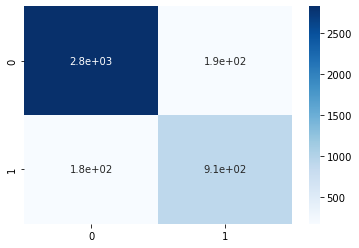

In [110]:
conf_matrix = confusion_matrix(y_test, predTree)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, predTree))

In [111]:
res1 = pd.DataFrame({'Algorithm': ['Decision Tree'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res1)

[Text(0.5667242703533026, 0.9583333333333334, 'X[5] <= 0.5\nentropy = 0.835\nsamples = 20468\nvalue = [15030, 5438]'),
 Text(0.3093717997951869, 0.875, 'X[4] <= 0.5\nentropy = 0.37\nsamples = 11953\nvalue = [11102, 851]'),
 Text(0.2244783666154634, 0.7916666666666666, 'X[68] <= 0.5\nentropy = 0.279\nsamples = 11139\nvalue = [10601, 538]'),
 Text(0.17617127496159754, 0.7083333333333334, 'X[17] <= 0.5\nentropy = 0.235\nsamples = 10957\nvalue = [10536, 421]'),
 Text(0.12602406554019457, 0.625, 'X[56] <= 0.5\nentropy = 0.301\nsamples = 7814\nvalue = [7397, 417]'),
 Text(0.06502816180235535, 0.5416666666666666, 'X[11] <= 0.5\nentropy = 0.533\nsamples = 1724\nvalue = [1515, 209]'),
 Text(0.03558627752176139, 0.4583333333333333, 'X[14] <= 2.5\nentropy = 0.348\nsamples = 994\nvalue = [929, 65]'),
 Text(0.017921146953405017, 0.375, 'X[6] <= -0.5\nentropy = 0.536\nsamples = 425\nvalue = [373, 52]'),
 Text(0.006144393241167435, 0.2916666666666667, 'X[1] <= 14.5\nentropy = 0.21\nsamples = 151\nval

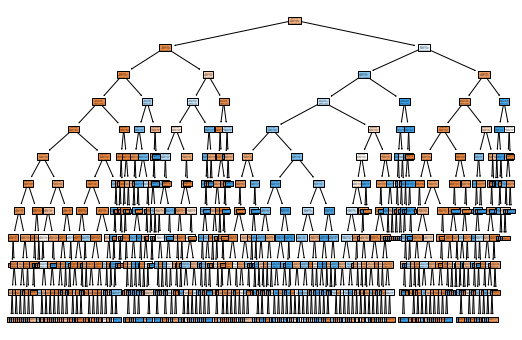

In [112]:
plt.figure(figsize=(9, 6))
tree.plot_tree(clf, filled = True)

In [113]:
# Важность признаков
feature_imp = pd.Series(DTree.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

col_5      0.315817
col_106    0.143018
col_83     0.123606
col_111    0.063561
col_4      0.040944
             ...   
col_79     0.000000
col_81     0.000000
col_84     0.000000
col_85     0.000000
col_61     0.000000
Length: 97, dtype: float64

In [114]:
#sns.barplot(x= feature_imp, y = feature_imp.index)
#plt.xlabel("Важности признаков")
#plt.ylabel("Признаки")
#plt.show()

## Logistic Regression

In [115]:
# Стандартизация данных
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [116]:
model = LogisticRegression(C=10, solver = "liblinear")
model.fit(X_train_scaled, y_train)
predLR = model.predict(X_test_scaled)
print(model.score(X_test_scaled, y_test))

0.8798241328773815


In [117]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, model.predict(X_train_scaled)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, predLR))
acc = metrics.accuracy_score(y_test, predLR)
jacc = jaccard_score(y_test, predLR,pos_label=0)
f1 = f1_score(y_test, predLR, average='weighted')
roc = roc_auc_score(y_test, predLR)

Train set Accuracy:  0.8864663490900208
Test set Accuracy:  0.8798241328773815


[[2913   94]
 [ 398  689]]
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      3007
           1       0.88      0.63      0.74      1087

    accuracy                           0.88      4094
   macro avg       0.88      0.80      0.83      4094
weighted avg       0.88      0.88      0.87      4094



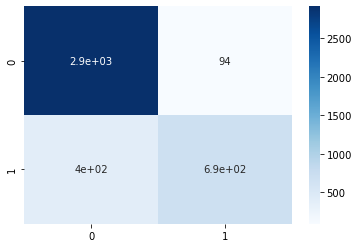

In [118]:
conf_matrix = confusion_matrix(y_test, predLR)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, predLR))

In [119]:
res2 = pd.DataFrame({'Algorithm': ['Logistic regression'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res2)

## Naive Bayes

In [120]:
from sklearn.naive_bayes import GaussianNB


In [121]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)
NB_pred = NB_model.predict(X_test)

In [122]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, NB_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, NB_pred))
acc = metrics.accuracy_score(y_test, NB_pred)
jacc = jaccard_score(y_test, NB_pred,pos_label=0)
f1 = f1_score(y_test, NB_pred, average='weighted')
roc = roc_auc_score(y_test, NB_pred)

Train set Accuracy:  0.725662635886161
Test set Accuracy:  0.7269174401563263


[[2969   38]
 [1080    7]]
              precision    recall  f1-score   support

           0       0.73      0.99      0.84      3007
           1       0.16      0.01      0.01      1087

    accuracy                           0.73      4094
   macro avg       0.44      0.50      0.43      4094
weighted avg       0.58      0.73      0.62      4094



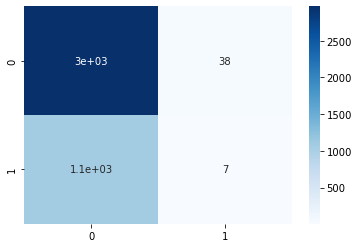

In [123]:
conf_matrix = confusion_matrix(y_test, NB_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, NB_pred))

In [124]:
res7 = pd.DataFrame({'Algorithm': ['Naive Bayes'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res7)

## Support Vector Classifier (SVC)

In [57]:
#svm_model = SVC(kernel ='linear', C = 1)
#svm_model.fit(X_train, y_train)
#svm_pred = svm_model.predict(X_test)

In [58]:
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm_model.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, svm_pred))
#print(jaccard_score(y_test, svm_pred,pos_label=0))
#print(f1_score(y_test, svm_pred, average='weighted'))

In [59]:
#conf_matrix = confusion_matrix(y_test, svm_pred)
#print(conf_matrix)
#sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
#print(classification_report(y_test, svm_pred))

In [60]:
# Важность признаков
#feature_imp = pd.Series(svm_model.feature_importances_, index = X.columns).sort_values(ascending = False)
#feature_imp

In [61]:
#sns.barplot(x= feature_imp, y = feature_imp.index)
#plt.xlabel("Важности признаков")
#plt.ylabel("Признаки")
#plt.show()

In [62]:
#res3 = pd.DataFrame({'Algorithm': ['Support Vector Classifier, linear kernel'],'Accuracy_score': [metrics.accuracy_score(y_test, svm_pred)], "J-score":[jaccard_score(y_test, svm_pred)], "F-1 score":[f1_score(y_test, svm_pred, average='weighted')]})
#Results = Results.append(res3)

In [63]:
#svm_model_1 = SVC(kernel='rbf', C=3, gamma=0.1, degree = 2)
#svm_model_1.fit(X_train, y_train)
#svm_pred1 = svm_model_1.predict(X_test)

In [64]:
#print("Train set Accuracy: ", metrics.accuracy_score(y_train, svm_model_1.predict(X_train)))
#print("Test set Accuracy: ", metrics.accuracy_score(y_test, svm_pred1))
#print(jaccard_score(y_test, svm_pred1,pos_label=0))
#print(f1_score(y_test, svm_pred1, average='weighted'))

In [65]:
#conf_matrix = confusion_matrix(y_test, svm_pred1)
#print(conf_matrix)
#sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
#print(classification_report(y_test, svm_pred1))

In [66]:
#res4 = pd.DataFrame({'Algorithm': ['Support Vector Classifier, nonlinear kernel'],'Accuracy_score': [metrics.accuracy_score(y_test, svm_pred1)], "J-score":[jaccard_score(y_test, svm_pred1)], "F-1 score":[f1_score(y_test, svm_pred1, average='weighted')]})
#Results = Results.append(res4)

In [67]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C':[0.1, 0.5, 1, 5, 10, 20, 100], 'gamma': [0.005, 0.01, 0.1, 1]}
grid_model = GridSearchCV(SVC(kernel="rbf"),param_grid, refit = True, verbose = 1)
grid_model.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 0.5, 1, 5, 10, 20, 100],
                         'gamma': [0.005, 0.01, 0.1, 1]},
             verbose=1)

In [68]:
grid_model_pred = grid_model.predict(X_test)
acc_svm_grid = accuracy_score(y_test, grid_model_pred)
print("Accuracy by grid_model_pred is {:.4f} %".format(acc_svm_grid*100))
conf_matrix = confusion_matrix(y_test, grid_model_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, grid_model_pred))

NameError: name 'accuracy_score' is not defined

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, grid_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, grid_model_pred))
acc = metrics.accuracy_score(y_test, grid_model_pred)
jacc = jaccard_score(y_test, grid_model_pred,pos_label=0)
f1 = f1_score(y_test, grid_model_pred, average='weighted')
roc = roc_auc_score(y_test, grid_model_pred)

In [ ]:
res10 = pd.DataFrame({'Algorithm': ['Support Vector Classifier'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res10)

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

models = [
    ("KNN", knn_model),
    ("Decision Tree", DTree),
    ("Logistic Regression", model),
    ('Naive Bayes', NB_model),
    ('SVM', grid_model)
]

model_displays = {}
for name, model in models:
    model_displays[name] = plot_roc_curve(
        model, X_test, y_test, ax=ax, name=name)
_ = ax.set_title('ROC curve')

In [ ]:
Results

## GradientBoostingClassifier 

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

GB_model = GradientBoostingClassifier()
GB_model.fit(X_train, y_train)
GB_pred = GB_model.predict(X_test)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, GB_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, GB_pred))
acc = metrics.accuracy_score(y_test, GB_pred)
jacc = jaccard_score(y_test, GB_pred,pos_label=0)
f1 = f1_score(y_test, GB_pred, average='weighted')
roc = roc_auc_score(y_test, GB_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, GB_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, GB_pred))

In [ ]:
# Снизим скорость обучения
GB_model_2 = GradientBoostingClassifier(learning_rate=0.005).fit(X_train, y_train)
GB_pred_2= GB_model.predict(X_test)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, GB_model_2.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, GB_pred_2))
print(jaccard_score(y_test, GB_pred_2,pos_label=0))
print(f1_score(y_test, GB_pred_2, average='weighted'))

In [ ]:
conf_matrix = confusion_matrix(y_test, GB_pred_2)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, GB_pred_2))

In [ ]:
res6 = pd.DataFrame({'Algorithm': ['Gradient Boosting Classifier'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res6)

## Random Forest Classifier 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=150, max_features='sqrt').fit(X_train, y_train)
RF_pred = RF_model.predict(X_test)

In [ ]:
#Вероятности для каждого класса
RF_prob = RF_model.predict_proba(X_test)
print(RF_pred)
print(RF_prob)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, RF_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, RF_pred))
acc = metrics.accuracy_score(y_test, RF_pred)
jacc = jaccard_score(y_test, RF_pred,pos_label=0)
f1 = f1_score(y_test, RF_pred, average='weighted')
roc = roc_auc_score(y_test, RF_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, RF_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, RF_pred))

In [ ]:
res5 = pd.DataFrame({'Algorithm': ['Random Forest Classifier'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res5)

In [ ]:
# Важность признаков
feature_imp = pd.Series(RF_model.feature_importances_, index = X.columns).sort_values(ascending = False)
feature_imp

In [ ]:
#sns.barplot(x= feature_imp, y = feature_imp.index)
#plt.xlabel("Важности признаков")
#plt.ylabel("Признаки")
#plt.show()

##  Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier
V_model = VotingClassifier([('RFC', RF_model),
                      ('KNN', knn_model),
                      ('GBC', GB_model)],
                      voting='soft',n_jobs=-1)
V_model.fit(X_train, y_train)
V_pred = V_model.predict(X_test)


In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, V_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, V_pred))
acc = metrics.accuracy_score(y_test, V_pred)
jacc = jaccard_score(y_test, V_pred,pos_label=0)
f1 = f1_score(y_test, V_pred, average='weighted')
roc = roc_auc_score(y_test, V_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, V_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, V_pred))

In [ ]:
res8 = pd.DataFrame({'Algorithm': ['Voting Classifier'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res8)

## Cat Boosting Classifier 

In [ ]:
from catboost import CatBoostClassifier, Pool
Cat_model = CatBoostClassifier(iterations=100,
                           depth=2, learning_rate = 1,
                           loss_function='Logloss')
Cat_model.fit(X_train, y_train)
Cat_pred = Cat_model.predict(X_test)

In [ ]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, Cat_model.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, Cat_pred))
acc = metrics.accuracy_score(y_test, Cat_pred)
jacc = jaccard_score(y_test, Cat_pred,pos_label=0)
f1 = f1_score(y_test, Cat_pred, average='weighted')
roc = roc_auc_score(y_test, Cat_pred)

In [ ]:
conf_matrix = confusion_matrix(y_test, V_pred)
print(conf_matrix)
sns.heatmap(conf_matrix, annot = True, cmap = 'Blues')
print(classification_report(y_test, V_pred))

In [ ]:
res9 = pd.DataFrame({'Algorithm': ['Cat Boosting Classifier'],'Accuracy_score': [acc], "J-score":[jacc], "F-1 score":[f1], "ROC-AUC-score": [roc]})
Results = Results.append(res9)

## Results

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

models = [
    ("KNN", knn_model),
    ("Decision Tree", DTree),
    ("LogisticRegression", model),
    ('Naive Bayes', NB_model),
    ('SVM', grid_model),
    ("Random Forest", RF_model),
    ("Gradient Boosting", GB_model),
    ("Voting model", V_model),
    ("Cat Boosting model", Cat_model)
]

model_displays = {}
for name, model in models:
    model_displays[name] = plot_roc_curve(
        model, X_test, y_test, ax=ax, name=name)
_ = ax.set_title('ROC curve')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_roc_curve

fig, ax = plt.subplots()

models = [
    ("Random Forest", RF_model),
    ("Gradient Boosting", GB_model),
    ("Voting model", V_model),
    ("Cat Boosting model", Cat_model)
]

model_displays = {}
for name, model in models:
    model_displays[name] = plot_roc_curve(
        model, X_test, y_test, ax=ax, name=name)
_ = ax.set_title('ROC curve')

In [ ]:
Results